# Godview

Prerequisite:
- knowing all possible labels
- knowing everything that happened and will happen in the video for every frame
- knowing the meanings of all labels.

In [26]:
import numpy as np
import pandas as pd

import cratutils as u
import godutils as g

import importlib
importlib.reload(u)
importlib.reload(g)

<module 'godutils' from '/Users/yx/Documents/pro/crat/godcrat/godutils.py'>

Videos is a map of filename to list

Each list represents a video (list of frames)

Each frame is a dataframe of agent information

`Map<String, List<DataFrame>> video;`

In [27]:
# Run this once
u.WriteRawDataToCache(includeInvalid=True)

100%|██████████| 677/677 [00:02<00:00, 229.21it/s]


In [28]:
videos = u.GetCachedRawVideos()

In [29]:
videos['0.csv'][0]

,TIMESTAMP,TRACK_ID,OBJECT_TYPE,X,Y,V_X,V_Y,A_X,A_Y,YAW,DYAW,DDYAW,first_class,second_class,third_class,fileName
37228,1.630377e+09,ego,0,0.000000,0.000000,-6.666265e-02,1.007535e+01,-2.730766e-01,4.143380e-02,0.000000,1.718444,-0.313116,0,0,1,0.csv
37229,1.630377e+09,scene-000000-1,2,-3.956840,2.794453,-3.164240e-01,1.744682e+01,2.670457e-01,1.789620e-01,1.522354,-0.888693,-1.126752,0,0,1,0.csv
37230,1.630377e+09,scene-000000-2,2,-0.133549,-16.591239,3.007621e-01,1.028293e+01,-3.472227e-01,7.374117e-02,356.251778,6.214802,-4.810373,0,0,1,0.csv
37231,1.630377e+09,scene-000000-3,2,-4.378153,27.572297,-9.661799e-01,1.698585e+01,1.258668e+00,-3.000787e-01,2.690841,-0.663327,2.067720,0,0,1,0.csv
37232,1.630377e+09,scene-000000-4,2,-2.816514,-24.751882,-3.206764e-01,1.503551e+01,5.815602e-01,-2.436730e-01,1.445300,1.827755,-0.423362,0,0,1,0.csv
37233,1.630377e+09,scene-000000-6,2,-14.421856,-12.423977,-1.534096e+00,-1.229391e+01,5.752503e+00,9.340733e-01,178.556031,1.606470,-6.200177,0,0,1,0.csv
37234,1.630377e+09,scene-000000-7,2,-15.031397,23.888237,2.234515e-01,-1.218319e+01,6.075779e-01,1.663938e+00,180.732652,3.253225,-1.847007,0,0,1,0.csv
37235,1.630377e+09,scene-000000-8,2,-5.388411,-42.020175,2.089329e+00,1.513805e+01,-3.028734e+00,2.648012e+00,358.500000,1.562318,-0.001849,0,0,1,0.csv
37236,1.630377e+09,scene-000000-12,2,-12.434600,38.094760,1.407019e-01,-1.418892e+01,4.619064e-01,2.496802e+00,178.498747,1.721038,-0.314784,0,0,1,0.csv
37237,1.630377e+09,scene-000000-14,2,-18.790126,-2.507166,-6.209392e-01,-1.252151e+01,1.305086e+00,-2.544562e+00,179.473663,-0.228793,1.635047,0,0,1,0.csv


In [30]:
count = 0

for k in videos:
    print(len(videos[k]))

40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
4

In [37]:
videos['0.csv'][0]

,TIMESTAMP,TRACK_ID,OBJECT_TYPE,X,Y,V_X,V_Y,A_X,A_Y,YAW,DYAW,DDYAW,first_class,second_class,third_class,fileName
37228,1.630377e+09,ego,0,0.000000,0.000000,-6.666265e-02,1.007535e+01,-2.730766e-01,4.143380e-02,0.000000,1.718444,-0.313116,0,0,1,0.csv
37229,1.630377e+09,scene-000000-1,2,-3.956840,2.794453,-3.164240e-01,1.744682e+01,2.670457e-01,1.789620e-01,1.522354,-0.888693,-1.126752,0,0,1,0.csv
37230,1.630377e+09,scene-000000-2,2,-0.133549,-16.591239,3.007621e-01,1.028293e+01,-3.472227e-01,7.374117e-02,356.251778,6.214802,-4.810373,0,0,1,0.csv
37231,1.630377e+09,scene-000000-3,2,-4.378153,27.572297,-9.661799e-01,1.698585e+01,1.258668e+00,-3.000787e-01,2.690841,-0.663327,2.067720,0,0,1,0.csv
37232,1.630377e+09,scene-000000-4,2,-2.816514,-24.751882,-3.206764e-01,1.503551e+01,5.815602e-01,-2.436730e-01,1.445300,1.827755,-0.423362,0,0,1,0.csv
37233,1.630377e+09,scene-000000-6,2,-14.421856,-12.423977,-1.534096e+00,-1.229391e+01,5.752503e+00,9.340733e-01,178.556031,1.606470,-6.200177,0,0,1,0.csv
37234,1.630377e+09,scene-000000-7,2,-15.031397,23.888237,2.234515e-01,-1.218319e+01,6.075779e-01,1.663938e+00,180.732652,3.253225,-1.847007,0,0,1,0.csv
37235,1.630377e+09,scene-000000-8,2,-5.388411,-42.020175,2.089329e+00,1.513805e+01,-3.028734e+00,2.648012e+00,358.500000,1.562318,-0.001849,0,0,1,0.csv
37236,1.630377e+09,scene-000000-12,2,-12.434600,38.094760,1.407019e-01,-1.418892e+01,4.619064e-01,2.496802e+00,178.498747,1.721038,-0.314784,0,0,1,0.csv
37237,1.630377e+09,scene-000000-14,2,-18.790126,-2.507166,-6.209392e-01,-1.252151e+01,1.305086e+00,-2.544562e+00,179.473663,-0.228793,1.635047,0,0,1,0.csv


In [43]:
t = g.Trajectories(videos['0.csv'])
t.getEgo(0)

In [36]:
importlib.reload(g)
np.array(g.ClassifyFrame(videos['0.csv'][0]))

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1])

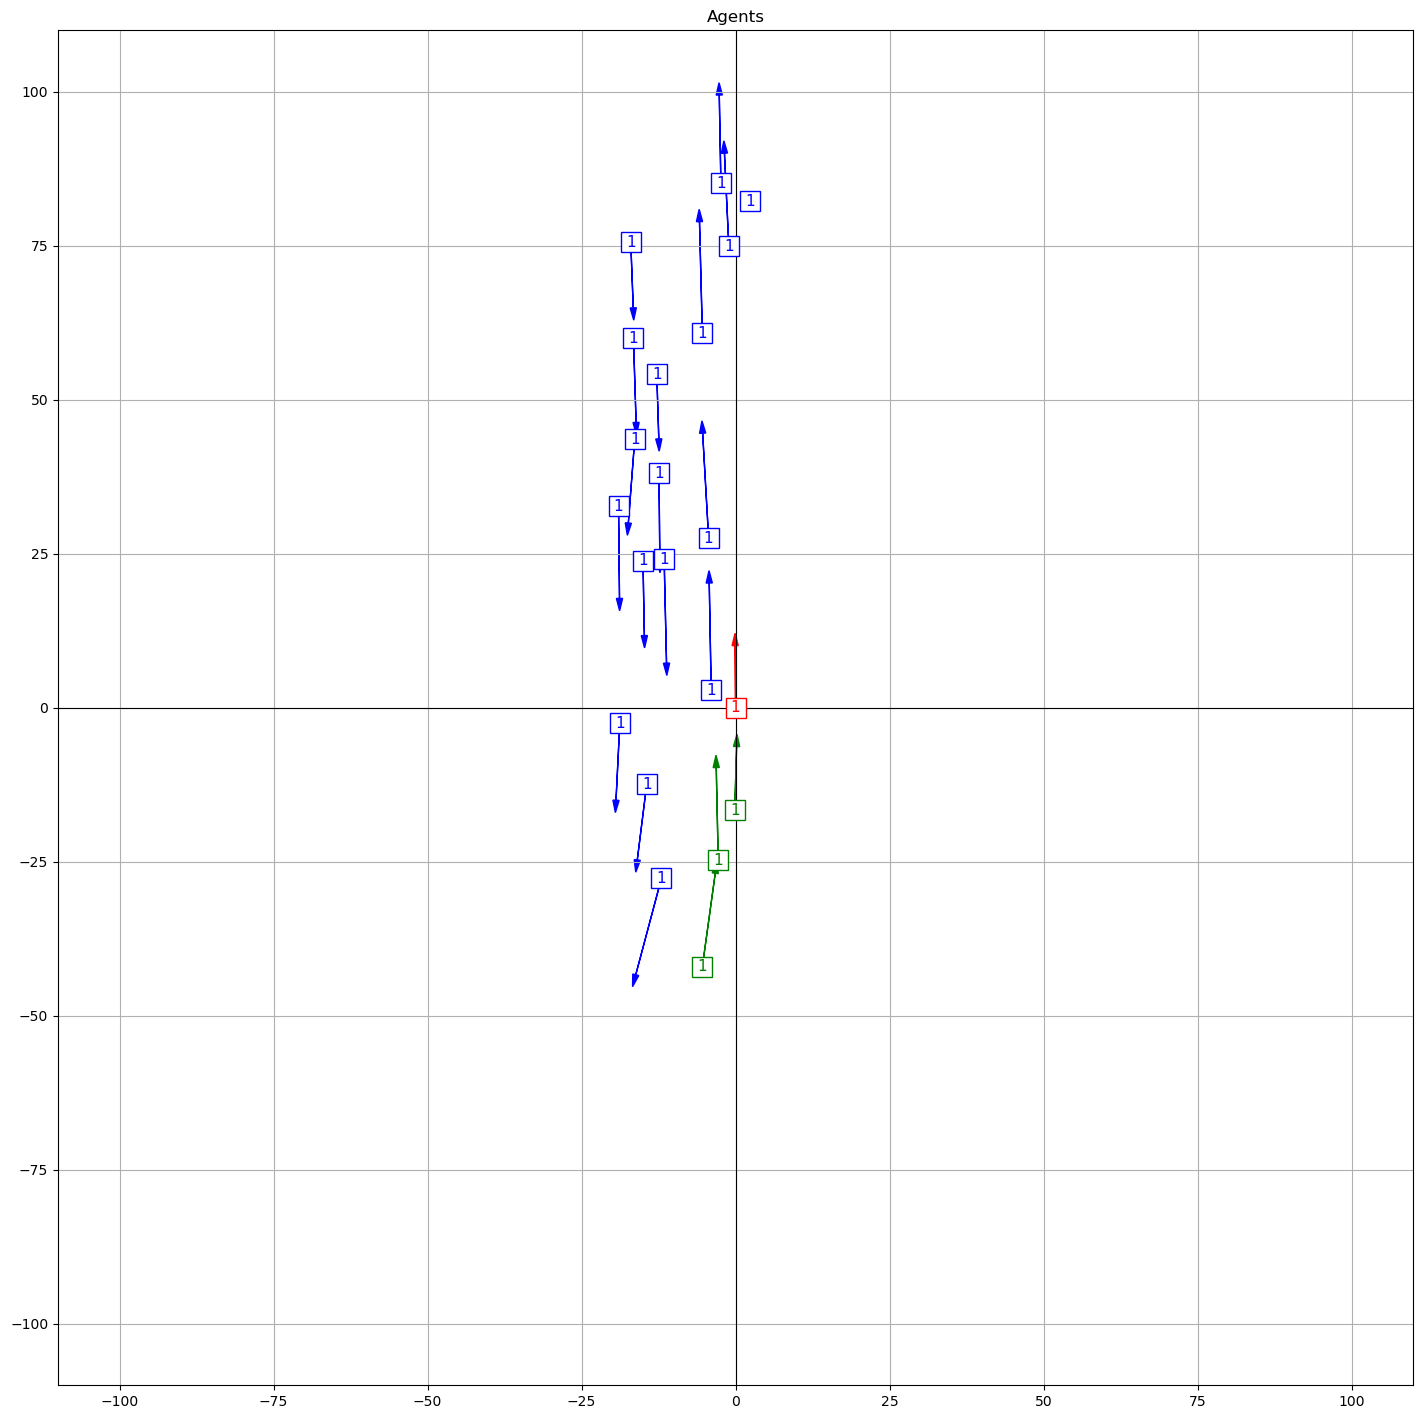

In [97]:
t = g.Trajectories(videos['0.csv'])
e = t.getEgo(0)
a = t.getAgent(0, 'scene-000000-1')


importlib.reload(g)
g.PlotAgents([e, *t.getNonEgoAgents(0)], size=110)

In [5]:
import pandas as pd
a = pd.DataFrame(
    {
        'A': [1, 2, 3],
        'B': [1, 2, 3],
        'C': [1, 2, 3],
    }
)
for i, j in a.iterrows():
    print(j)

A    1
B    1
C    1
Name: 0, dtype: int64
A    2
B    2
C    2
Name: 1, dtype: int64
A    3
B    3
C    3
Name: 2, dtype: int64


In [101]:
np.arctan2(-2, -1)

-2.0344439357957027